In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [2]:
nascidos = pd.read_csv('SINASC_RO_2019.csv')
nascidos.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [3]:
bins = [-1, 3, 5, 7, 10]
labels = ['asfixia grave', 'asfixia moderada', 'asfixia leve', 'normal']
nascidos['APGAR5_categoria'] = pd.cut(nascidos['APGAR5'], bins=bins, labels=labels)
print(nascidos[['APGAR5', 'APGAR5_categoria']].head(15))

    APGAR5 APGAR5_categoria
0     10.0           normal
1      9.0           normal
2     10.0           normal
3     10.0           normal
4     10.0           normal
5     10.0           normal
6     10.0           normal
7     10.0           normal
8      9.0           normal
9     10.0           normal
10     9.0           normal
11    10.0           normal
12     9.0           normal
13     9.0           normal
14     7.0     asfixia leve


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

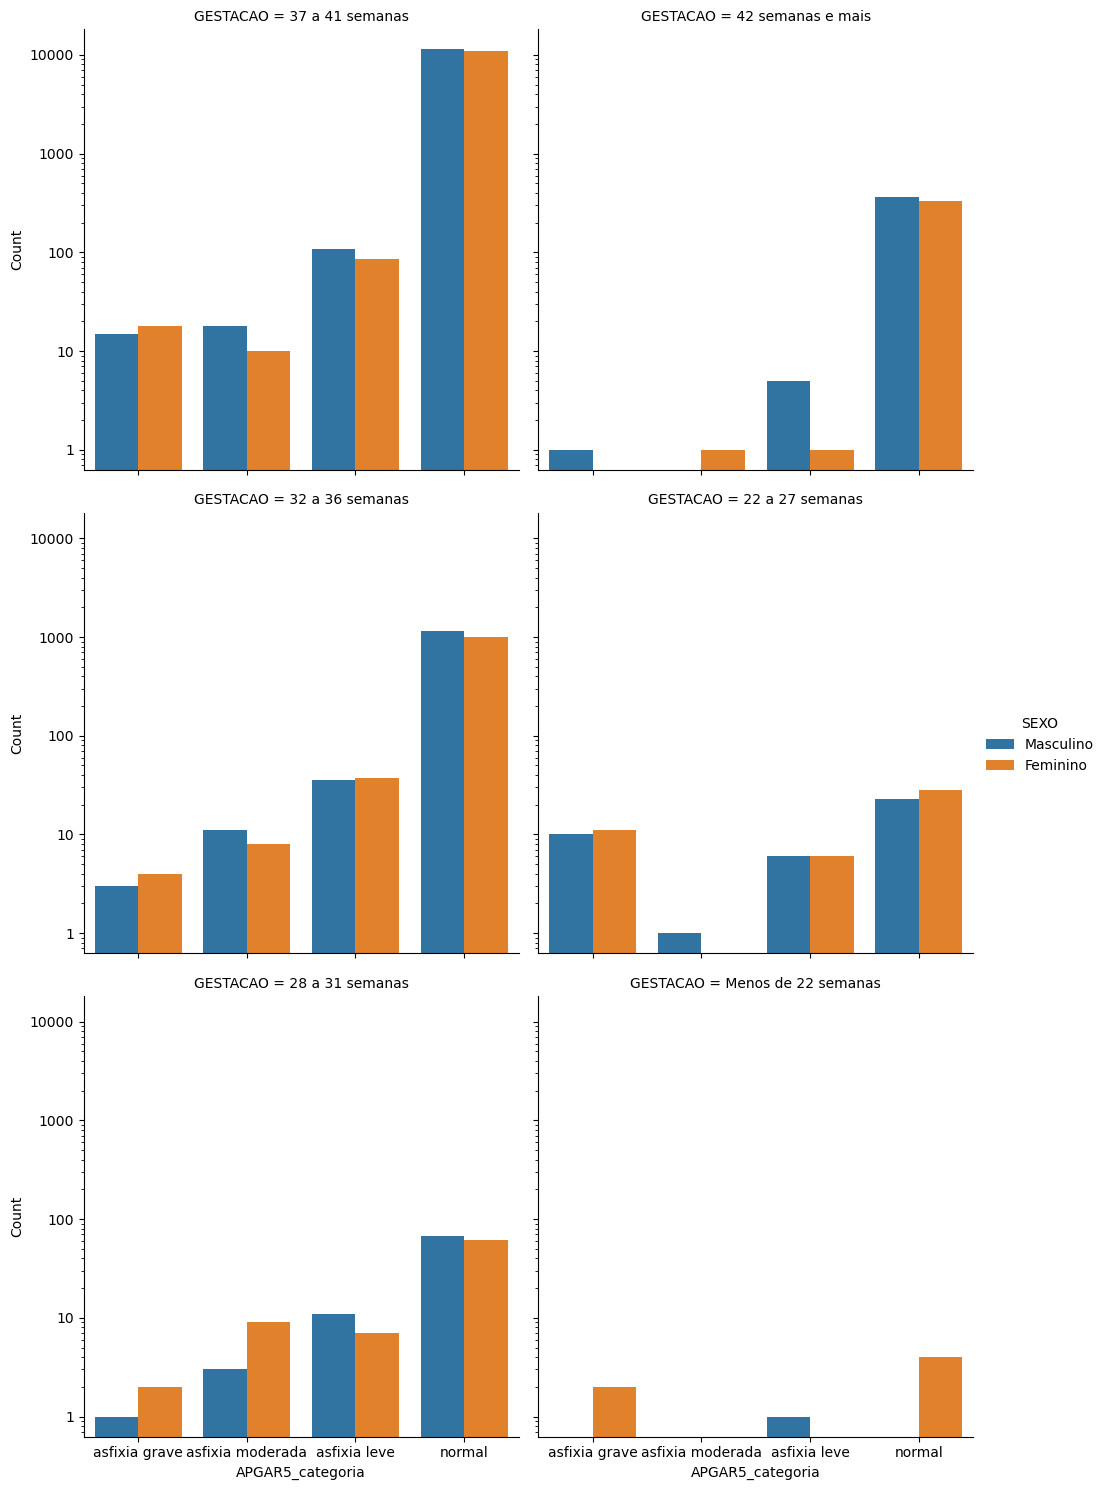

In [4]:
g = sns.catplot(data=nascidos, x='APGAR5_categoria', hue='SEXO', col='GESTACAO', col_wrap=2, kind='count')
g.set(yscale='log', yticks=[1, 10, 100, 1000, 10000], yticklabels=['1', '10', '100', '1000', '10000'])
g.set_ylabels('Count')
plt.show()

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [5]:
tabela_cruzada = pd.crosstab(nascidos['GESTACAO'], nascidos['APGAR5_categoria'])
print(tabela_cruzada)

APGAR5_categoria     asfixia grave  asfixia moderada  asfixia leve  normal
GESTACAO                                                                  
22 a 27 semanas                 21                 1            12      51
28 a 31 semanas                  3                12            18     129
32 a 36 semanas                  8                19            73    2134
37 a 41 semanas                 33                28           196   22266
42 semanas e mais                1                 1             6     690
Menos de 22 semanas              2                 0             1       4


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [6]:
tabela_cruzada = pd.crosstab(nascidos['GESTACAO'], nascidos['APGAR5_categoria'])
tabela_percentual_linha = tabela_cruzada.div(tabela_cruzada.sum(axis=1), axis=0)
print(tabela_percentual_linha)

APGAR5_categoria     asfixia grave  asfixia moderada  asfixia leve    normal
GESTACAO                                                                    
22 a 27 semanas           0.247059          0.011765      0.141176  0.600000
28 a 31 semanas           0.018519          0.074074      0.111111  0.796296
32 a 36 semanas           0.003581          0.008505      0.032677  0.955237
37 a 41 semanas           0.001465          0.001243      0.008702  0.988589
42 semanas e mais         0.001433          0.001433      0.008596  0.988539
Menos de 22 semanas       0.285714          0.000000      0.142857  0.571429


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

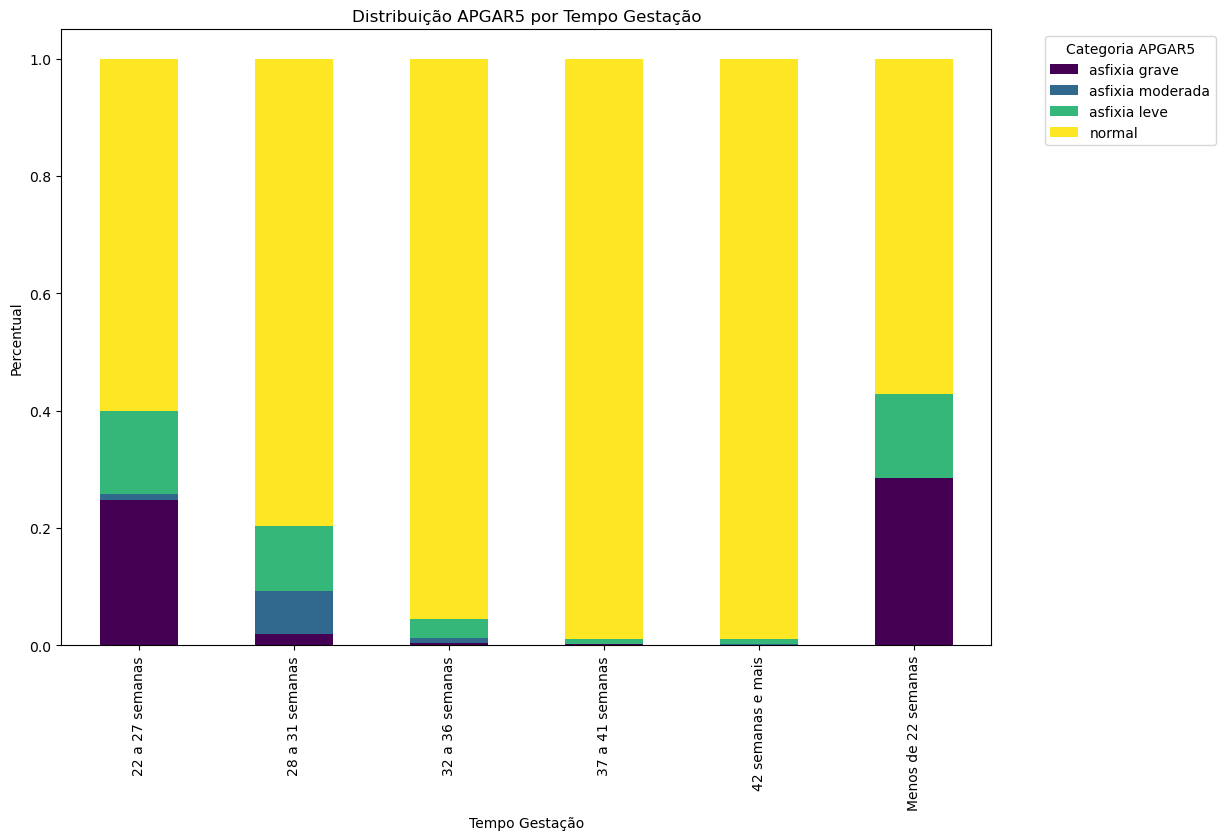

In [7]:
tabela_cruzada = pd.crosstab(nascidos['GESTACAO'], nascidos['APGAR5_categoria'])
tabela_percentual_linha = tabela_cruzada.div(tabela_cruzada.sum(axis=1), axis=0)
tabela_percentual_linha.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12, 8))
plt.title('Distribuição APGAR5 por Tempo Gestação')
plt.xlabel('Tempo Gestação')
plt.ylabel('Percentual')
plt.legend(title='Categoria APGAR5', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

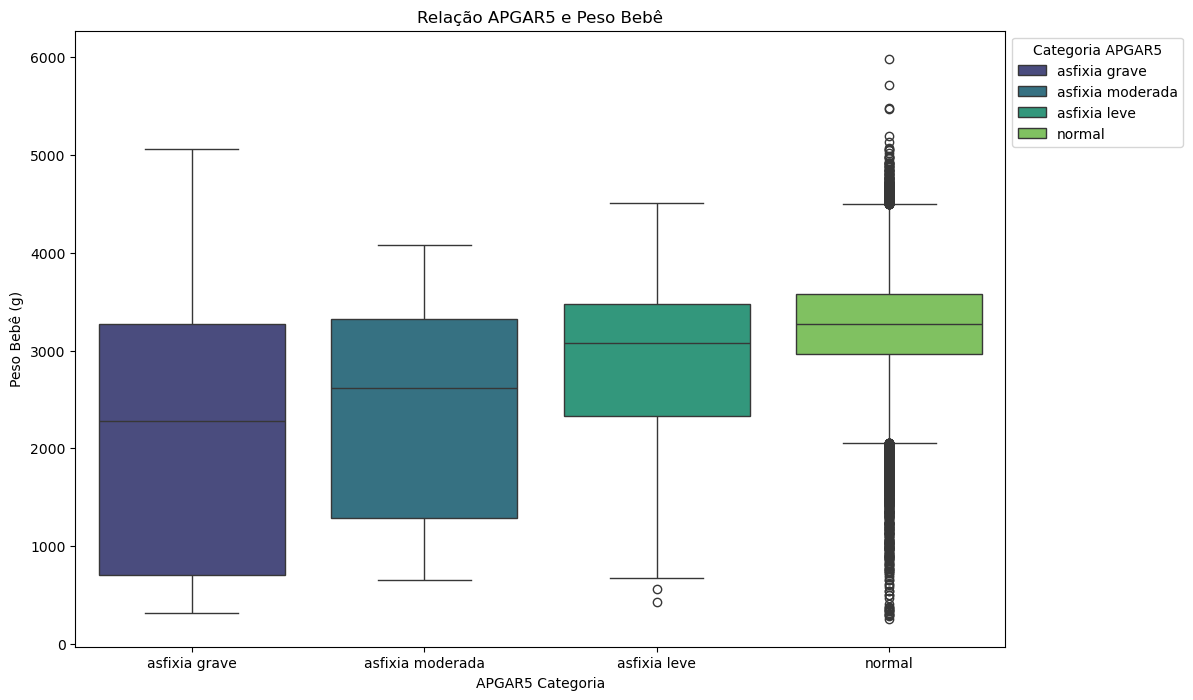

In [8]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=nascidos, x='APGAR5_categoria', y='PESO', order=['asfixia grave', 'asfixia moderada', 'asfixia leve', 'normal'], palette='viridis', hue='APGAR5_categoria', dodge=False)
plt.title('Relação APGAR5 e Peso Bebê')
plt.xlabel('APGAR5 Categoria')
plt.ylabel('Peso Bebê (g)')
plt.legend(title='Categoria APGAR5', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()